# Regresión Lineal simple en Python

## El paquete statsmodel para regresión lineal

In [51]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Improtaciones fastf1
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
#
#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 150)
#pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [7]:
ff1.Cache.enable_cache('cache')

In [12]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
driver1 = input('Piloto 1: ')

Año: 2022
Round: 11
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: LEC


In [13]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '44', '63', '31', '47', '4', '20', '3', '14', '77', '23', '18', '24', '10', '22', '5', '55', '6', '11']


In [14]:
drv_laps = session.laps.pick_driver(driver1)

In [118]:
# print(f"{drv_laps.LapNumber} - {drv_laps['LapTime']}")

In [108]:
#https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
drv_laps['Tiempos'] = pd.to_numeric(drv_laps['LapTime'], errors='ignore',downcast='float')

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_34670/907990146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['Tiempos'] = pd.to_numeric(drv_laps['LapTime'], errors='ignore',downcast='float')


In [133]:
print(drv_laps['Tiempos'])
drv_laps['LapTimes']=pd.to_datetime(drv_laps['Tiempos'],errors='ignore',yearfirst=True)
print(drv_laps['LapTimes'])

0    -9.223372e+18
1     7.060900e+10
2     6.992800e+10
3     7.013800e+10
4     7.026800e+10
5     7.032900e+10
6     7.032100e+10
7     7.072100e+10
8     7.088300e+10
9     7.140300e+10
10    7.093400e+10
11    7.046100e+10
12    7.060100e+10
13    7.087700e+10
14    7.065600e+10
15    7.045600e+10
16    7.051400e+10
17    7.078400e+10
18    7.062700e+10
19    7.046300e+10
20    7.079000e+10
21    7.069300e+10
22    7.072700e+10
23    7.145500e+10
24    7.134300e+10
25    7.480100e+10
26    8.697300e+10
27    6.947900e+10
28    6.898400e+10
29    6.955300e+10
30    6.973700e+10
31    7.010600e+10
32    6.966500e+10
33    7.004500e+10
34    6.967800e+10
35    6.990800e+10
36    6.986400e+10
37    7.012200e+10
38    7.056700e+10
39    7.207400e+10
40    7.084100e+10
41    7.007900e+10
42    7.047800e+10
43    6.998900e+10
44    7.026700e+10
45    7.048700e+10
46    7.065800e+10
47    7.058400e+10
48    7.454000e+10
49    8.653100e+10
50    6.907100e+10
51    6.899200e+10
52    6.9192

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_34670/4287578421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimes']=pd.to_datetime(drv_laps['Tiempos'],errors='ignore',yearfirst=True)


<AxesSubplot:>

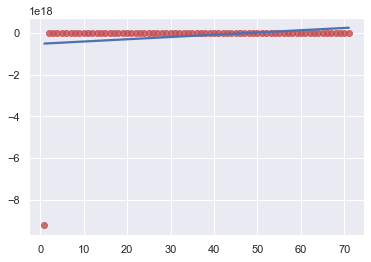

In [134]:
sns.regplot(x=drv_laps.LapNumber, y=drv_laps.Tiempos, order=1, ci=None, scatter_kws={'color':'r'})
#plt.xlim(1,71)
#plt.ylim(ymin=1e5);

In [139]:
lm = smf.ols(formula="Tiempos~LapNumber", data = drv_laps).fit()

sales_pred = lm.predict(pd.DataFrame(drv_laps["LapNumber"]))
sales_pred
drv_laps.sales_pred = sales_pred

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_34670/1433872054.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  drv_laps.sales_pred = sales_pred


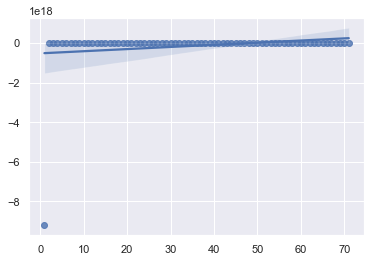

In [87]:
sns.set_theme(color_codes=True)
#laps = sns.load_dataset("tips")
ax = sns.regplot(x="LapNumber", y="Tiempos", data=drv_laps)

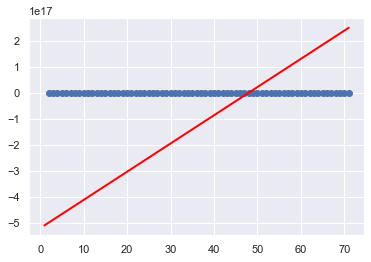

In [143]:
#corregido
%matplotlib inline
plt.scatter(x = drv_laps.LapNumber, y= drv_laps.LapTime)
plt.plot(drv_laps.LapNumber, drv_laps.sales_pred, color = 'red',linewidth = 2)

In [144]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(drv_laps.LapNumber, with_mean=True, with_std=False).reshape(-1,1)
y = drv_laps.Tiempos

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
print(regr.score(X,y))

-1.2990657811537752e+17
[1.08255541e+16]
0.041666625167343097


In [19]:
advertising = pd.read_csv("../datasets/ads/Advertising.csv")
advertising.head()

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/ads/Advertising.csv'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


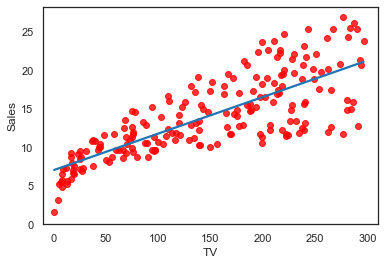

In [48]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

In [49]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)
print(regr.score(X,y))

14.0225
[0.04753664]
0.611875050850071


In [50]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.reshape(-1,1))**2)/1000
min_rss

AttributeError: 'Series' object has no attribute 'reshape'

NameError: name 'xx' is not defined

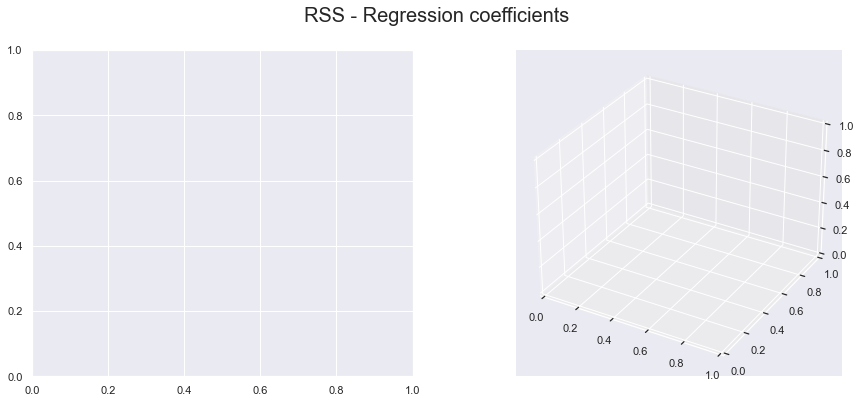

In [90]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=cm.Set1, alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [92]:
est = smf.ols('Tiempos ~ LapNumber', drv_laps).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5.196e+17,2.59e+17,-2.007,0.049,-1.04e+18,-3.12e+15
LapNumber,1.083e+16,6.25e+15,1.732,0.088,-1.64e+15,2.33e+16


In [94]:
# RSS with regression coefficients
((drv_laps.Tiempos - (est.params[0] + est.params[1]*drv_laps.LapNumber))**2).sum()/1000

8.037773168424522e+34

In [95]:
regr = skl_lm.LinearRegression()

X = drv_laps.LapNumber.reshape(-1,1)
y = drv_laps.Tiempos

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

AttributeError: 'Lap' object has no attribute 'reshape'

In [96]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [57]:
data.head()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [58]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [59]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo predictivo sería Sales = 7.032594 + 0.047537 * TV

In [7]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared

0.611875050850071

In [9]:
lm.rsquared_adj

0.6099148238341623

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        12:41:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


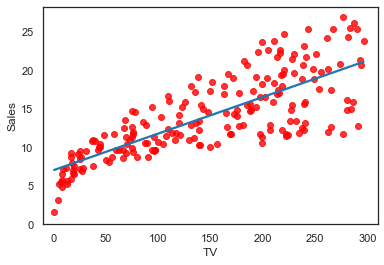

In [63]:
sns.regplot(data.TV, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

In [15]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [16]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [17]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [22]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [24]:
sales_m = np.mean(data["Sales"])


In [25]:
sales_m

14.022500000000003

In [26]:
error = RSE/sales_m

In [27]:
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

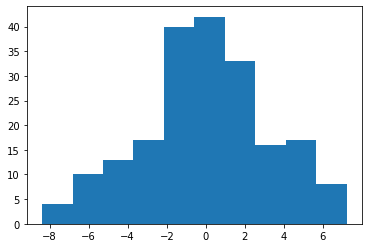

In [28]:
plt.hist((data["Sales"]-data["sales_pred"]))